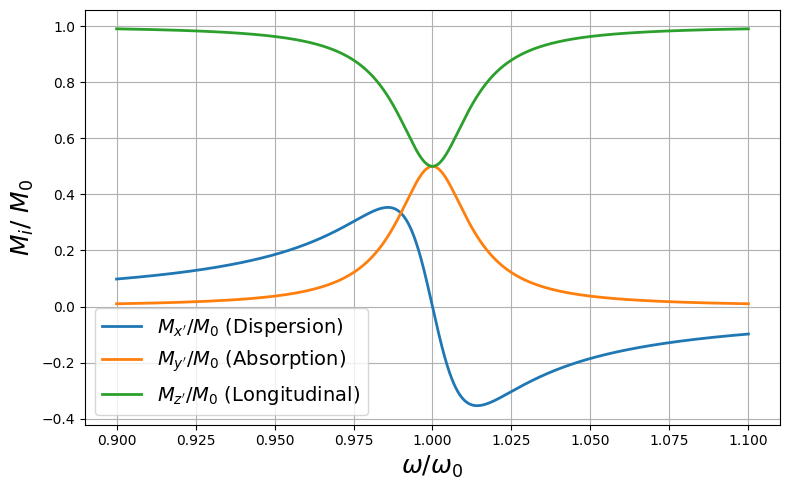

In [10]:
# ratio of magnetisation to M_0 against omega/omega_0
import numpy as np
import matplotlib.pyplot as plt

# Parameters
TgammaB0 = 100.0       # T * gamma * B0
TgammaB1 = 1.0         # Stronger RF field for visible saturation

# Frequency range (normalized frequency x = omega / omega0)
x = np.linspace(0.9, 1.1, 3000)

# Detuning term: T * Delta = T * (omega0 - omega)
DeltaT = TgammaB0 * (1 - x)

# Denominator of steady-state solutions
D = 1 + DeltaT**2 + TgammaB1**2

# Steady-state components (normalized to M0)
Mx = (TgammaB1 * DeltaT) / D
My = (TgammaB1) / D
Mz = (1 + DeltaT**2) / D

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, Mx, label=r"$M_{x'}/M_0$ (Dispersion)", linewidth=2)
plt.plot(x, My, label=r"$M_{y'}/M_0$ (Absorption)", linewidth=2)
plt.plot(x, Mz, label=r"$M_{z'}/M_0$ (Longitudinal)", linewidth=2)

plt.xlabel(r'$\omega / \omega_0$', fontsize=18) # omega/omega0, this is why resonance at x=1
plt.ylabel('$M_i$/ $M_0$', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("magnetisation_ratio.pdf")
plt.show()


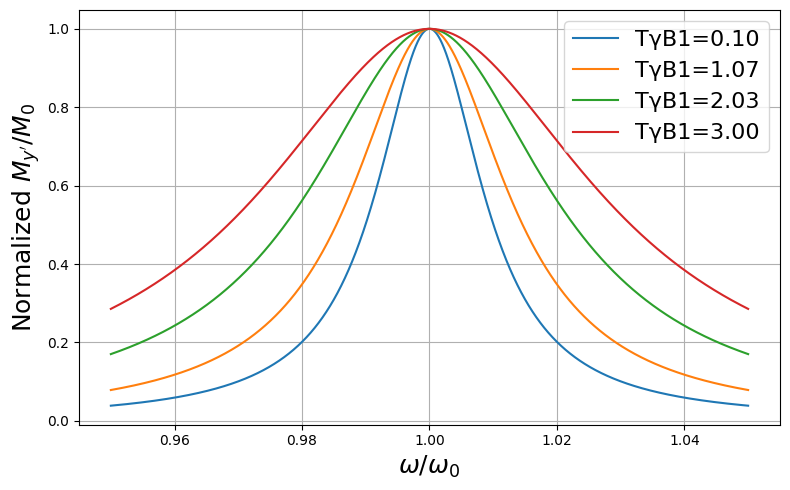

In [13]:
# power broadening of NMR absorption line only
# can be used to find FWHM
import numpy as np
import matplotlib.pyplot as plt

# Fixed parameter
TgammaB0 = 100.0   # T * gamma * B0

# RF strengths to test
TgammaB1_values = np.linspace(0.1, 3.0, 4) # 4 values between 0.1 and 3


# Frequency axis
x = np.linspace(0.95, 1.05, 20000)
DeltaT = TgammaB0 * (1 - x)


plt.figure(figsize=(8,5))

for TgammaB1 in TgammaB1_values:

    s = TgammaB1**2

    # Absorption curve
    My = TgammaB1 / (1 + DeltaT**2 + TgammaB1**2)

    # Normalize to peak = 1 for width measurement
    My_norm = My / np.max(My)

    # Plot absorption curve
    plt.plot(x, My_norm, label=f"TγB1={TgammaB1:.2f}")

plt.xlabel(r"$\omega / \omega_0$", fontsize=18)   # this is 'x' = omega/omega0 where omega0= gammaB0, plotting w/w0 makes resonance at x=1.
plt.ylabel("Normalized $M_{y'}/M_0$", fontsize=18) # both x and y axis are dimensionless
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("power_broadening.pdf")
plt.show()



#note peak is normalised to 1 in graph 1, to allow easier finding og FWHM. because the curve is an exact lorentzian in delta (omega0-omega)
#the power broadening factor root(1-a^2) comes from the RF driving.
#the linewidth is the detuning needed to reduce the response by half.
#finding the FWHM answers how far off resonance must i move before the system absorbs only half as strongly.

#the FWHM depends on relative height not absolute values, FWHM defined as the width of the peak at half of its maximum value. so normalising is purely visual and computationally convenient
